## TP 5 : Compression

Let but de ce TP est de constater qu'en enlevant les séquences les moins probable, on peut se permettre une petite erreur pour compresser le signal

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

In [1]:
import numpy as np
import scipy.special 
import matplotlib.pyplot as plt

Commencez par tracer la loi binomial, de paramètre $N=100$ et $p=0.1$. Vous tracerez la courbe sur une échelle linéaire puis sur une échelle log.
  1. Que constatez vous sur la probabilité de séquence de variables de Bernoulli, de paramètre $p=0.1$ comportant beaucoup de $1$ ?
  * Si on fixe un seuil à $10^{-5}$ pour la probabilité, combien de $1$ pourront contenir les séquence possibles ??
  * Combien faut-il générer de séquence suivant cette loi pour espérer obtenir une séquence dont la probabilité est environ de $10^{-5}$

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

In [2]:
# plot de la binomial
# TODO

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

Version 0

In [3]:
# plot de la binomial
def plot_bin(n,p1):
    x = []
    y = []
    for i in range(n):
        x.append(i)
        y.append( scipy.special.binom(n,i) * p1**i * (1-p1)**(n-i) )
    return x,y


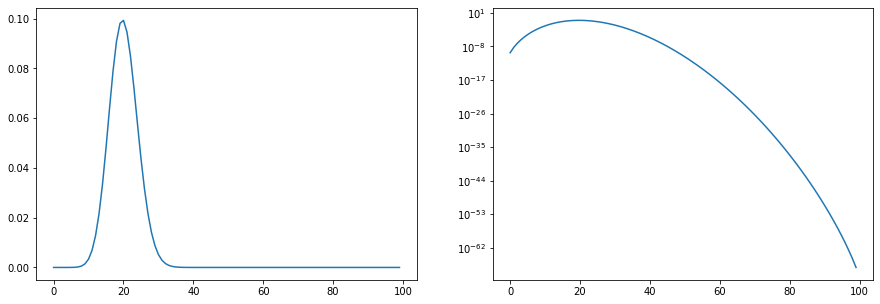

In [4]:
x,y = plot_bin(100,0.2)
f,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x,y)
ax[1].semilogy(x,y)

Version 1

In [5]:
def binom(n, p1):
    l =  [scipy.special.binom(n,i) * p1**i * (1-p1)**(n-i) for i in range(n)]
    return l

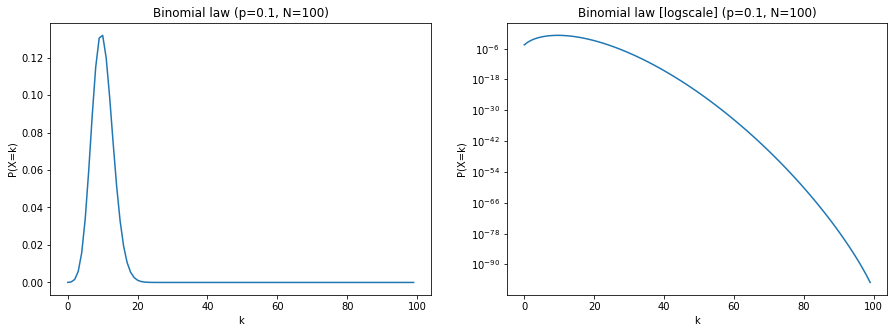

In [6]:
N = 100
p1 = 0.1
x = list(range(N))
y = binom(N, p1)
f,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x, y)
ax[0].set_ylabel('P(X=k)')
ax[0].set_xlabel('k')
ax[0].set_title('Binomial law (p={p1}, N={N})'.format(**locals()))

#Log
ax[1].semilogy(x, y)
ax[1].set_ylabel('P(X=k)')
ax[1].set_xlabel('k')
ax[1].set_title('Binomial law [logscale] (p={p1}, N={N})'.format(**locals()))
plt.show()

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  * Si on fixe un seuil à $10^{-5}$ pour la probabilité, combien de $1$ pourront contenir les séquence possibles ??


<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [7]:
answer_t = np.where(np.array(y)>10**(-5))
answer = answer_t[0]
s = ",".join([str(a) for a in answer])
print(f"with 1e-5 proba we can have sequences containing [{s}] 1 and the rest is 0")

with 1e-5 proba we can have sequences containing [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24] 1 and the rest is 0


<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

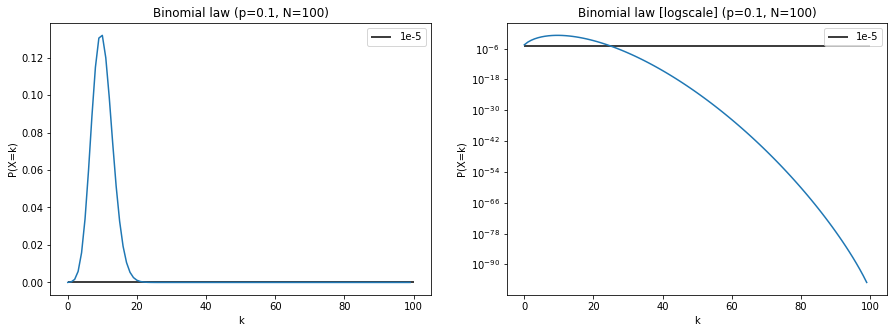

In [8]:
N = 100
p1 = 0.1
x = list(range(N))
y = binom(N, p1)
f,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x, y)
ax[0].hlines(1e-5, 0, 100, label='1e-5')
ax[0].set_ylabel('P(X=k)')
ax[0].set_xlabel('k')
ax[0].set_title('Binomial law (p={p1}, N={N})'.format(**locals()))
ax[0].legend()

#Log
ax[1].semilogy(x, y)
ax[1].hlines(1e-5, 0, 100, label='1e-5')
ax[1].set_ylabel('P(X=k)')
ax[1].set_xlabel('k')
ax[1].set_title('Binomial law [logscale] (p={p1}, N={N})'.format(**locals()))
ax[1].legend()
plt.show()

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  * Combien faut-il générer de séquence suivant cette loi pour espérer obtenir une séquence dont la probabilité est environ de $10^{-5}$

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [9]:
proba = np.array(y)
where_small_proba = np.where(np.array(y)<1e-5)[0]
small_proba = proba[where_small_proba]
proba_total_small = np.sum(small_proba)

In [10]:
print(proba_total_small)


1.3072817431250409e-05


<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

Ecrire la fonction suivante (pour un $N$ et un $p$ donné): 
  * Pour chaque $i$, vous compterez le nombre de séquence existant ainsi que la probabilité de l'ensemble des séquences.
  * Vous calculerez alors pour chaque $i$ le nombre de séquence cumulé (le nombre de séquence ayant un nombre de $1$ compris entre $0$ et $i$.
  * Vous calculerez également le poids (en probabilité) de ces séquences pour chaque $i$.
  * Afficher pour $N=10,20,50,100,200,500,1000$, la courbe : $2^N - \# \text{seq}$, versus la probabilité cumulée
  
Note : vous utiliserez la fonction "coef_bin(k,n)" (k<=n) pour calculer le coefficient de la loi binomial $\mathcal{C}^k_n$.

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

In [11]:

# coef binomial C^k_n
def coef_bin(k,n):
    return np.math.factorial(n) // (np.math.factorial(k)*np.math.factorial(n-k))


  1. On veut compter combien il existe de séquence donc la somme est égale à $i$, pour $i$ allant de $0$ à $N$ (inclus).


In [12]:
def count_nb_sequence(i, N):
    return coef_bin(i, N)
    

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

In [13]:
n = 5
i = 2

nb_sequence = count_nb_sequence(i, n)
print(nb_sequence)

10


Exemple n=5, i=2 :
```
11000
10100
10010
10001
01100
01010
01001
00110
00101
00011
```
On a bien 10 séquences possibles

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  * Pour chaque $i$, vous calculerez la probabilité de l'ensemble des séquences.

ie $p(X\in \{\text{sequences that contains i times 1}\}) $

In [14]:
# TODO

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [15]:
proba_seq = coef_bin(i, n) * p1**(n-i) * (1-p1)**i # binom(n-i,n,p1)

In [16]:
def p_binom(i, p, n=10):
    proba_seq = coef_bin(i, n) * p**(n-i) * (1-p)**i
    return proba_seq

In [17]:
p_binom(2, 0.1, 5)

0.008100000000000001

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  * Vous calculerez alors pour chaque $i$ le nombre de séquence cumulé ie. le nombre de séquence ayant un nombre de $1$ compris entre $0$ et $i$.


In [18]:
# TODO

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [19]:
nb_sequence_cumul = sum([count_nb_sequence(j, N) for j in range(i)])


In [20]:
print(nb_sequence_cumul)

101


<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  * Vous calculerez également le poids (en probabilité) de ces séquences pour chaque $i$.
  * Afficher pour $N=10,20,50,100,200,500,1000$, la courbe : $2^N - \# \text{seq}$, versus la probabilité cumulée


<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [21]:

def plot_code_compress(n,p1):
    cumul_x = 0
    cumul_y = 2**n
    x = [0]
    y = [2**n]
    for i in range(0,n+1):
        cout_pr = coef_bin(i,n) * p1**(n-i) * (1-p1)**i # binom(i,n,p1)
        nb_seq = coef_bin(i,n)

        cumul_x += cout_pr
        cumul_y -= nb_seq

        x.append(cumul_x)
        y.append(cumul_y)
        
    y = np.array(y)
    x = np.array(x)
    for i in range(0,n+1):
        y[i] = np.math.log2(y[i])
    return x, y/n

def Entropy(p):
    return -p*np.log2(p)-(1-p)*np.log2(1-p)

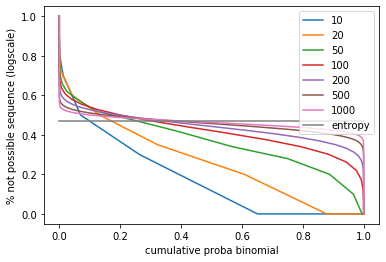

In [22]:
for ni in [10,20,50,100,200,500,1000]:
    x, y = plot_code_compress(ni, 0.1)
    plt.plot(x, y, label=ni)

plt.plot([0,1], 2*[Entropy(0.1)], label='entropy')

plt.ylabel('% not possible sequence (logscale)')
plt.xlabel('cumulative proba binomial')
plt.legend()
plt.show()

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

### Code de Huffman

Regardons comment mettre en place le code de Huffman pour des chaînes de caractères.
  1. Ecrire la fonction Freq, qui renvoie le nombre de fois où apparaît un caractère dans la chaîne. Renvoyer le résulat sous la forme d'un dictionnaire [caractère]->freq

<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

In [23]:
def compute_occurences(text):
    # TODO
    return {}

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

**Version 0 : quand on ne connait pas bien la lib standard de python.**

In [24]:
def table_frequences(texte):
    table = {}
    for caractere in texte:
        if caractere in table:
            table[caractere] = table[caractere] + 1
        else:
            table[caractere] = 1
    return table

In [25]:
# s = 'abcddccddde'
s = 'Ils agitent des urnes en carton où les salariés glissent régulièrement quelques pièces et même des billets. « A défaut de faire grève, soutenez les grévistes ! », lancent les délégués syndicaux à leurs collègues aux portes de l’usine.'
freq = table_frequences(s)
print(freq)

{'I': 1, 'l': 16, 's': 23, ' ': 38, 'a': 9, 'g': 7, 'i': 10, 't': 12, 'e': 29, 'n': 11, 'd': 7, 'u': 12, 'r': 10, 'c': 5, 'o': 5, 'ù': 1, 'é': 7, 'è': 4, 'm': 3, 'q': 2, 'p': 2, 'ê': 1, 'b': 1, '.': 2, '«': 1, 'A': 1, 'f': 2, 'v': 2, ',': 2, 'z': 1, '!': 1, '»': 1, 'y': 1, 'x': 2, 'à': 1, '’': 1}


**Version 1 : en utilisant Counter**

In [26]:
from collections import Counter

def compute_occurences(texte):
    count  = Counter()
    count.update(texte)
    return count

In [27]:
s = 'Ils agitent des urnes en carton où les salariés glissent régulièrement quelques pièces et même des billets. « A défaut de faire grève, soutenez les grévistes ! », lancent les délégués syndicaux à leurs collègues aux portes de l’usine.'
occ = compute_occurences(s)
print(occ)

Counter({' ': 38, 'e': 29, 's': 23, 'l': 16, 't': 12, 'u': 12, 'n': 11, 'i': 10, 'r': 10, 'a': 9, 'g': 7, 'd': 7, 'é': 7, 'c': 5, 'o': 5, 'è': 4, 'm': 3, 'q': 2, 'p': 2, '.': 2, 'f': 2, 'v': 2, ',': 2, 'x': 2, 'I': 1, 'ù': 1, 'ê': 1, 'b': 1, '«': 1, 'A': 1, 'z': 1, '!': 1, '»': 1, 'y': 1, 'à': 1, '’': 1})


<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

### Ecrire la fonction ```make_tree``` qui, à partir d'un dictionnaire de fréquences créer un arbre
  
  * transformer votre dictionnaire sous la forme d'une liste de tuple (freq,caractere)

On cherche à isoler les éléments les moins fréquents pour leur donner un code plus long. On va donc répéter l'opération suivante (jusqu'à n'avoir plus qu'un élément dans le tas):

  * trouver les deux éléments du tas les moins fréquents et les "poper" de la liste.
  * rajouter la "jointure" des deux éléments de la façon suivant : (fq1+fq2, {0:c1, 1:c2}) où fq1,fq2 sont les fréquences et c1,c2 les caractères

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

In [28]:
def make_tree(occurences):
    # TODO
    return {}

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

**Version 0 : moche avec un faux tas qui recalcule le min à chaque fois**

In [29]:
def make_tree(occurrences):
    # Construction d'un tas avec les lettres sous forme de feuilles
    tas = [(occ, lettre) for (lettre, occ) in occurrences.items()]
    # print("tas=",tas)
    # Creation de l'arbre
    while len(tas) >= 2:
        # find the min
        occ1, n1 = tas.pop(np.argmin([it[0] for it in tas]))
        occ2, n2 = tas.pop(np.argmin([it[0] for it in tas]))
        tas.append((occ1+occ2, {0:n1, 1:n2}))
        # ajoute au tas le noeud de poids occ1+occ2 et avec les fils noeud1 et noeud2

    return tas[0][1]

**Version 1 : avec un vrai tas.**

In [32]:
# Play with Tuple comparison in python
t1 = (2, 2, 'a')
t2 = (1, 3, {0: 'a', 1:'b'})

print("t1 == t2 :", t1 == t2)
print("t1 > t2  :", t1 > t2)
print("t1 < t2  :", t1 < t2)


t1 == t2 : False
t1 > t2  : True
t1 < t2  : False


In [33]:
import heapq

def make_tree(occurrences):
    """Prepare tree out of occurences of symbol for Huffman compressing"""
    # To avoid comparing letters to dict we add a "tie-breaker" as an unique integer i
    heap = [(occ, i, lettre) for i, (lettre, occ) in enumerate(occurrences.items())]
    heapq.heapify(heap)
    i = len(heap)
    while len(heap) >= 2:
        occ1, _, n1 = heapq.heappop(heap)
        occ2, _, n2 = heapq.heappop(heap)
        heapq.heappush(heap, (occ1+occ2, i, {0:n1, 1:n2}))
        i += 1
    return heap[0][2]


<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

In [34]:
tree = make_tree(freq)

In [35]:
import pprint
pprint.pprint(tree)

{0: {0: {0: {0: {0: 'o', 1: {0: {0: 'à', 1: '’'}, 1: 'm'}}, 1: 'n'}, 1: 's'},
     1: {0: {0: 't', 1: 'u'}, 1: 'e'}},
 1: {0: {0: {0: {0: 'g', 1: 'd'},
             1: {0: 'é', 1: {0: 'è', 1: {0: 'q', 1: 'p'}}}},
         1: {0: 'l',
             1: {0: {0: {0: '.', 1: 'f'}, 1: {0: 'v', 1: ','}},
                 1: {0: {0: 'x', 1: {0: 'I', 1: 'ù'}},
                     1: {0: {0: 'ê', 1: 'b'}, 1: {0: '«', 1: 'A'}}}}}},
     1: {0: ' ',
         1: {0: {0: 'a',
                 1: {0: {0: {0: 'z', 1: '!'}, 1: {0: '»', 1: 'y'}}, 1: 'c'}},
             1: {0: 'i', 1: 'r'}}}}}


In [36]:
def printTree(tree, prefix=""):
    if not prefix:
        print('.')
    if len(tree) <= 1:
        print(prefix+"└──", tree)
    else:
        sub_tree = tree.items()
        for i, (key, val) in enumerate(sub_tree):
            if i < len(sub_tree)-1:
                print(prefix+"├── "+str(key))
                new_prefix = prefix+"│   "
            else:
                print(prefix+"└── "+str(key))
                new_prefix = prefix+"    "
            printTree(val, prefix=new_prefix)


In [37]:
printTree(tree)

.
├── 0
│   ├── 0
│   │   ├── 0
│   │   │   ├── 0
│   │   │   │   ├── 0
│   │   │   │   │   └── o
│   │   │   │   └── 1
│   │   │   │       ├── 0
│   │   │   │       │   ├── 0
│   │   │   │       │   │   └── à
│   │   │   │       │   └── 1
│   │   │   │       │       └── ’
│   │   │   │       └── 1
│   │   │   │           └── m
│   │   │   └── 1
│   │   │       └── n
│   │   └── 1
│   │       └── s
│   └── 1
│       ├── 0
│       │   ├── 0
│       │   │   └── t
│       │   └── 1
│       │       └── u
│       └── 1
│           └── e
└── 1
    ├── 0
    │   ├── 0
    │   │   ├── 0
    │   │   │   ├── 0
    │   │   │   │   └── g
    │   │   │   └── 1
    │   │   │       └── d
    │   │   └── 1
    │   │       ├── 0
    │   │       │   └── é
    │   │       └── 1
    │   │           ├── 0
    │   │           │   └── è
    │   │           └── 1
    │   │               ├── 0
    │   │               │   └── q
    │   │               └── 1
    │   │                   └── p
    │   └── 1
    │ 

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

#### Ecriture du code d'Huffman à partir de l'arbre

  * à partir du dictionnaire créé par la fonction ```make_tree```, construire un dictionnaire qui à un caractère lui associe son code

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

In [38]:
def code_huffman(tree, prefix, code):
    # TODO
    return {}

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

**Version 0**

In [39]:
def is_leaf(subtree):
    return len(subtree) == 1

def code_huffman(tree, prefix, code):
    for node in tree:
        if is_leaf(tree[node]):
            code[prefix+str(node)] = tree[node]
        else:
            code_huffman(tree[node], prefix+str(node), code)

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

### Make the ascii code

In [40]:
code = {}
code_huffman(tree,'',code)
print(code)

{'00000': 'o', '0000100': 'à', '0000101': '’', '000011': 'm', '0001': 'n', '001': 's', '0100': 't', '0101': 'u', '011': 'e', '10000': 'g', '10001': 'd', '10010': 'é', '100110': 'è', '1001110': 'q', '1001111': 'p', '1010': 'l', '1011000': '.', '1011001': 'f', '1011010': 'v', '1011011': ',', '1011100': 'x', '10111010': 'I', '10111011': 'ù', '10111100': 'ê', '10111101': 'b', '10111110': '«', '10111111': 'A', '110': ' ', '11100': 'a', '11101000': 'z', '11101001': '!', '11101010': '»', '11101011': 'y', '111011': 'c', '11110': 'i', '11111': 'r'}


In [41]:
inv_map = {v: k for k, v in code.items()}
inv_map

{'o': '00000',
 'à': '0000100',
 '’': '0000101',
 'm': '000011',
 'n': '0001',
 's': '001',
 't': '0100',
 'u': '0101',
 'e': '011',
 'g': '10000',
 'd': '10001',
 'é': '10010',
 'è': '100110',
 'q': '1001110',
 'p': '1001111',
 'l': '1010',
 '.': '1011000',
 'f': '1011001',
 'v': '1011010',
 ',': '1011011',
 'x': '1011100',
 'I': '10111010',
 'ù': '10111011',
 'ê': '10111100',
 'b': '10111101',
 '«': '10111110',
 'A': '10111111',
 ' ': '110',
 'a': '11100',
 'z': '11101000',
 '!': '11101001',
 '»': '11101010',
 'y': '11101011',
 'c': '111011',
 'i': '11110',
 'r': '11111'}

In [42]:
res = ''
for c in s:
    res = res+inv_map[c]

In [43]:
print(res)
print()
print(len(res))
print(len(s)*8)

1011101010100011101110010000111100100011000101001101000101100111001011111100010110011100110001110111011111001111101000000000011100000010111011110101001100111000111100101011100111111111010010001110100001010111100010010110001010011011111100101000001011010111101001101111101100001101100010100110100111001010111010100111001010110011101001111111101001101110110110011100110100110000011101111000000110111101000101100111010111101111101010101001101000011011000110101111101101011111111010001100101011001111000101010011010001011110101100111100111101111101111010000111111001101011010011101101111000100000010101000110001011111010001101010011001110100001111110010101101011110001010001100111011101001110111010101011011110101011100000111101101100010100110101001100111010001100101010100101000001011001000111000111101011000110001111101110111110001011011100110000010011010100110101111110011101110110000010101010100110100000101011001110111000101101110011010011110000011111010001100111010001011110101000001010101001111100

#### Calculer l'entropie de la chaîne de caractères

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

In [44]:
def Entropy(fq):
    # TODO
    return 0.0

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [45]:
def Entropy(fq):
    totfq = np.sum([j for i,j in freq.items()])
    S = 0
    for i,j in freq.items():
        S += j/totfq * np.log(1/(j/totfq))
    return S


In [46]:
totfq = np.sum([j for i,j in freq.items()])
print(totfq)

234


In [47]:
Entropy(freq)

2.9779598443925566

In [48]:
1896*(1/2.9)

653.7931034482759

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

In [49]:
res = ''.join([str(bin(ord(c)))[2:] for c in s])
print(res)

1001001110110011100111000001100001110011111010011110100110010111011101110100100000110010011001011110011100000111010111100101101110110010111100111000001100101110111010000011000111100001111001011101001101111110111010000011011111111100110000011011001100101111001110000011100111100001110110011000011110010110100111101001111001110000011001111101100110100111100111110011110010111011101110100100000111001011101001110011111101011101100110100111101000111001011001011101101110010111011101110100100000111000111101011100101110110011100011110101110010111100111000001110000110100111101000110001111001011110011100000110010111101001000001101101111010101101101110010110000011001001100101111001110000011000101101001110110011011001100101111010011100111011101000001010101110000010000011000001100100111010011100110110000111101011110100100000110010011001011000001100110110000111010011110010110010110000011001111110010111010001110110110010110110010000011100111101111111010111101001100101110111011001011111010100000110110011